In [15]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import os

sider = pd.read_csv("../data/binarised/sider/sider_binarised.csv.gz", compression="gzip")
sider

,Standardized_SMILES,Standardized_InChI,Hepatobiliary disorders,Metabolism and nutrition disorders,Product issues,Eye disorders,Investigations,Musculoskeletal and connective tissue disorders,Gastrointestinal disorders,Social circumstances,...,"Congenital, familial and genetic disorders",Infections and infestations,"Respiratory, thoracic and mediastinal disorders",Psychiatric disorders,Renal and urinary disorders,"Pregnancy, puerperium and perinatal conditions",Ear and labyrinth disorders,Cardiac disorders,Nervous system disorders,"Injury, poisoning and procedural complications"
0,[NH3+]CC[NH2+]CC[NH2+]CC[NH2+]CC[NH3+],InChI=1S/C8H23N5/c9-1-3-11-5-7-13-8-6-12-4-2-1...,1,1,0,0,1,1,1,0,...,0,0,1,1,0,0,1,1,1,0
1,CC(C)(C)c1cc(C(C)(C)C)c(NC(=O)c2c[n-]c3ccccc3c...,"InChI=1S/C24H28N2O3/c1-23(2,3)16-11-17(24(4,5)...",0,1,0,0,1,1,1,0,...,0,1,1,0,0,0,1,0,1,0
2,C#CC1(O)CCC2C3CCC4=CCCCC4C3C(=C)CC21CC,InChI=1S/C22H30O/c1-4-21-14-15(3)20-17-9-7-6-8...,0,1,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,C#CC1(O)CCC2C3CC=C4CC(=O)CCC4C3C(=C)CC21CC,InChI=1S/C22H28O2/c1-4-21-13-14(3)20-17-9-7-16...,1,1,0,1,1,1,1,0,...,1,1,1,1,1,1,0,0,1,1
4,NC(=O)N1c2ccccc2CC(O)c2ccccc21,InChI=1S/C15H14N2O2/c16-15(19)17-12-7-3-1-5-10...,1,1,0,1,1,1,1,0,...,0,1,1,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,CC1C[NH+](CC(Cc2ccccc2)C(=O)NCC(=O)[O-])CCC1(C...,"InChI=1S/C25H32N2O4/c1-18-16-27(12-11-25(18,2)...",0,1,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
1318,CCC1OC(=O)C(C)C(=O)C(C)C(OC2OC(C)CC([NH+](C)C)...,InChI=1S/C43H65N5O10/c1-12-33-43(8)37(48(41(53...,1,1,0,1,1,1,1,0,...,0,1,1,1,1,0,1,1,1,1
1319,CCOc1ccc(Cc2cc(C3OC(CO)C(O)C(O)C3O)ccc2Cl)cc1,InChI=1S/C21H25ClO6/c1-2-27-15-6-3-12(4-7-15)9...,1,1,0,0,1,1,1,0,...,0,1,0,0,1,0,0,1,1,1
1320,O=c1[n-]c2ccccc2n1C1CC[NH+](CCCC(c2ccc(F)cc2)c...,InChI=1S/C28H29F2N3O/c29-22-11-7-20(8-12-22)25...,0,1,0,1,1,1,1,0,...,0,0,0,1,1,0,0,1,1,1


In [16]:
DICTrank = pd.read_csv("../data/binarised/DICTrank/DICTrank_binarised.csv.gz", compression="gzip")
DICTrank

,Trade Name,Generic/Proper Name(s),Active Ingredient(s),DICT _ Concern,Standardized_SMILES,Standardized_InChI,DICTrank
0,anzemet,dolasetron mesylate,dolasetron mesylate,most,O=C(OC1CC2CC3CC(C1)[NH+]2CC3=O)c1c[nH]c2ccccc12,InChI=1S/C19H20N2O3/c22-18-10-21-12-5-11(18)6-...,1
1,trazodone hydrochloride,trazodone hydrochloride,trazodone hydrochloride,most,O=c1n(CCC[NH+]2CCN(c3cccc(Cl)c3)CC2)nc2ccccn12,InChI=1S/C19H22ClN5O/c20-16-5-3-6-17(15-16)23-...,1
2,nuplazid,pimavanserin tartrate,pimavanserin tartrate,most,CC(C)COc1ccc(CNC(=O)[NH+](Cc2ccc(F)cc2)C2CC[NH...,InChI=1S/C25H34FN3O2/c1-19(2)18-31-24-10-6-20(...,1
3,metformin hydrochloride,metformin hydrochloride,metformin hydrochloride,most,C[NH+](C)C([NH3+])=NC(N)=[NH2+],"InChI=1S/C4H11N5/c1-9(2)4(7)8-3(5)6/h1-2H3,(H5...",1
4,flurbiprofen,flurbiprofen,flurbiprofen,most,CC(C(=O)[O-])c1ccc(-c2ccccc2)c(F)c1,InChI=1S/C15H13FO2/c1-10(15(17)18)12-7-8-13(14...,1
...,...,...,...,...,...,...,...
1015,propylthiouracil,propylthiouracil,propylthiouracil,no,CCCc1cc(=O)[n-]c(=S)[n-]1,InChI=1S/C7H10N2OS/c1-2-3-5-4-6(10)9-7(11)8-5/...,0
1016,trecator,ethionamide,ethionamide,no,CCc1cc(C([NH3+])=S)ccn1,InChI=1S/C8H10N2S/c1-2-7-5-6(8(9)11)3-4-10-7/h...,0
1017,ethosuximide,ethosuximide,ethosuximide,no,CCC1(C)CC(=O)NC1=O,InChI=1S/C7H11NO2/c1-3-7(2)4-5(9)8-6(7)10/h3-4...,0
1018,disulfiram,disulfiram,disulfiram,no,CC[NH+](CC)C(=S)SSC(=S)[NH+](CC)CC,InChI=1S/C10H20N2S4/c1-5-11(6-2)9(13)15-16-10(...,0


In [17]:
# Merge the two datasets on the 'Standardized_SMILES' column
merged_df = DICTrank.merge(sider, on='Standardized_SMILES', suffixes=('_df1', '_df2'))
merged_df

,Trade Name,Generic/Proper Name(s),Active Ingredient(s),DICT _ Concern,Standardized_SMILES,Standardized_InChI_df1,DICTrank,Standardized_InChI_df2,Hepatobiliary disorders,Metabolism and nutrition disorders,...,"Congenital, familial and genetic disorders",Infections and infestations,"Respiratory, thoracic and mediastinal disorders",Psychiatric disorders,Renal and urinary disorders,"Pregnancy, puerperium and perinatal conditions",Ear and labyrinth disorders,Cardiac disorders,Nervous system disorders,"Injury, poisoning and procedural complications"
0,anzemet,dolasetron mesylate,dolasetron mesylate,most,O=C(OC1CC2CC3CC(C1)[NH+]2CC3=O)c1c[nH]c2ccccc12,InChI=1S/C19H20N2O3/c22-18-10-21-12-5-11(18)6-...,1,InChI=1S/C19H20N2O3/c22-18-10-21-12-5-11(18)6-...,1,1,...,0,1,1,1,1,0,1,1,1,1
1,trazodone hydrochloride,trazodone hydrochloride,trazodone hydrochloride,most,O=c1n(CCC[NH+]2CCN(c3cccc(Cl)c3)CC2)nc2ccccn12,InChI=1S/C19H22ClN5O/c20-16-5-3-6-17(15-16)23-...,1,InChI=1S/C19H22ClN5O/c20-16-5-3-6-17(15-16)23-...,1,1,...,0,0,1,1,1,0,1,1,1,1
2,metformin hydrochloride,metformin hydrochloride,metformin hydrochloride,most,C[NH+](C)C([NH3+])=NC(N)=[NH2+],"InChI=1S/C4H11N5/c1-9(2)4(7)8-3(5)6/h1-2H3,(H5...",1,"InChI=1S/C4H11N5/c1-9(2)4(7)8-3(5)6/h1-2H3,(H5...",1,1,...,0,1,1,1,1,0,1,1,1,1
3,flurbiprofen,flurbiprofen,flurbiprofen,most,CC(C(=O)[O-])c1ccc(-c2ccccc2)c(F)c1,InChI=1S/C15H13FO2/c1-10(15(17)18)12-7-8-13(14...,1,InChI=1S/C15H13FO2/c1-10(15(17)18)12-7-8-13(14...,1,1,...,0,1,1,1,1,0,1,1,1,1
4,ketoprofen,ketoprofen,ketoprofen,most,CC(C(=O)[O-])c1cccc(C(=O)c2ccccc2)c1,InChI=1S/C16H14O3/c1-11(16(18)19)13-8-5-9-14(1...,1,InChI=1S/C16H14O3/c1-11(16(18)19)13-8-5-9-14(1...,1,1,...,0,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,propylthiouracil,propylthiouracil,propylthiouracil,no,CCCc1cc(=O)[n-]c(=S)[n-]1,InChI=1S/C7H10N2OS/c1-2-3-5-4-6(10)9-7(11)8-5/...,0,InChI=1S/C7H10N2OS/c1-2-3-5-4-6(10)9-7(11)8-5/...,1,0,...,0,0,1,0,1,0,1,0,1,1
772,trecator,ethionamide,ethionamide,no,CCc1cc(C([NH3+])=S)ccn1,InChI=1S/C8H10N2S/c1-2-7-5-6(8(9)11)3-4-10-7/h...,0,InChI=1S/C8H10N2S/c1-2-7-5-6(8(9)11)3-4-10-7/h...,1,1,...,0,0,0,1,0,0,0,0,1,0
773,ethosuximide,ethosuximide,ethosuximide,no,CCC1(C)CC(=O)NC1=O,InChI=1S/C7H11NO2/c1-3-7(2)4-5(9)8-6(7)10/h3-4...,0,InChI=1S/C7H11NO2/c1-3-7(2)4-5(9)8-6(7)10/h3-4...,0,1,...,0,0,1,1,1,0,0,0,1,0
774,disulfiram,disulfiram,disulfiram,no,CC[NH+](CC)C(=S)SSC(=S)[NH+](CC)CC,InChI=1S/C10H20N2S4/c1-5-11(6-2)9(13)15-16-10(...,0,InChI=1S/C10H20N2S4/c1-5-11(6-2)9(13)15-16-10(...,1,0,...,0,0,0,1,0,0,0,0,1,0


Proportion of Hepatobiliary disorders


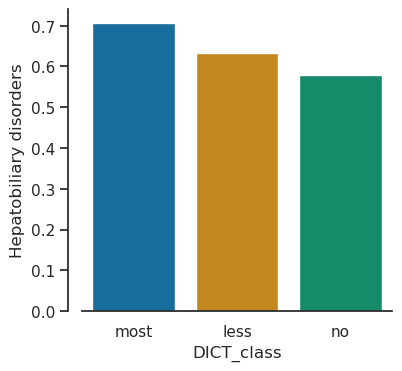

Proportion of Metabolism and nutrition disorders


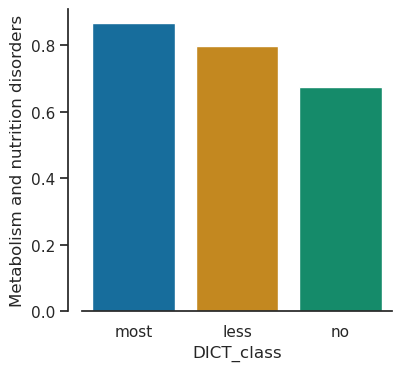

Proportion of Product issues


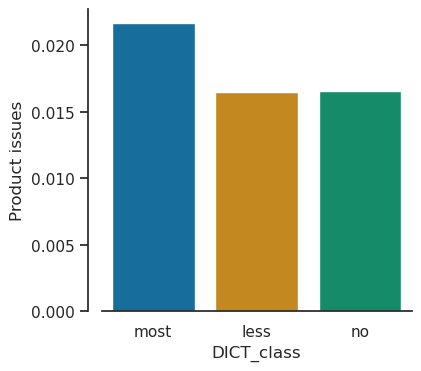

Proportion of Eye disorders


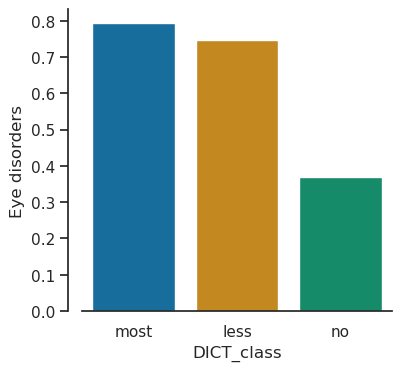

Proportion of Investigations


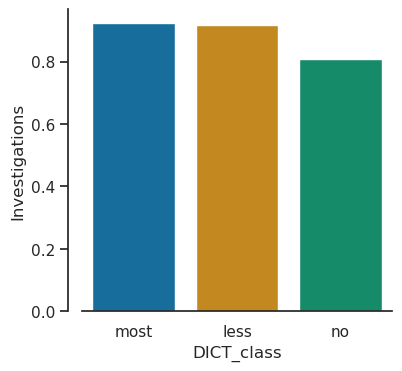

Proportion of Musculoskeletal and connective tissue disorders


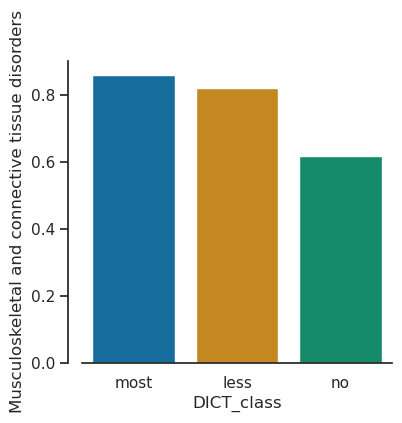

Proportion of Gastrointestinal disorders


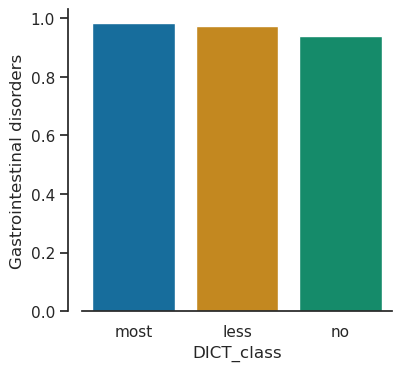

Proportion of Social circumstances


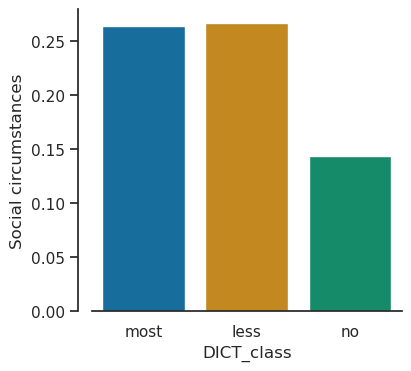

Proportion of Immune system disorders


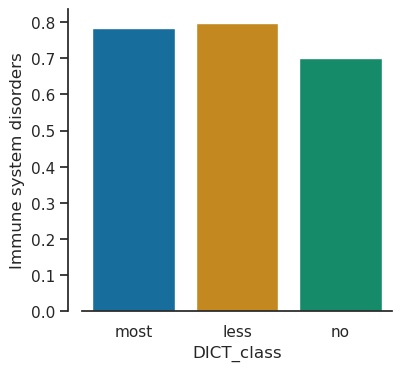

Proportion of Reproductive system and breast disorders


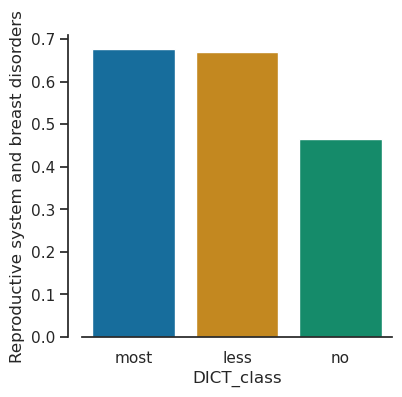

Proportion of Neoplasms benign, malignant and unspecified (incl cysts and polyps)


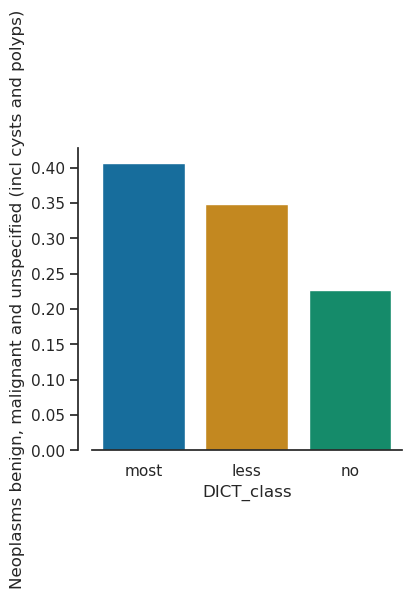

Proportion of General disorders and administration site conditions


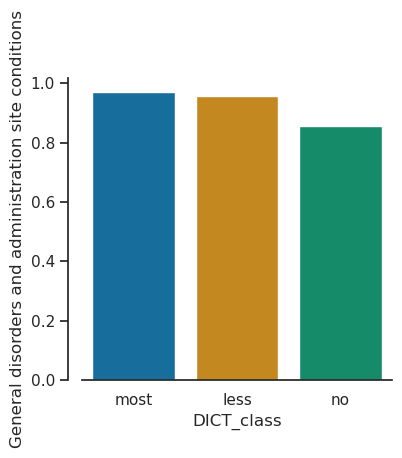

Proportion of Endocrine disorders


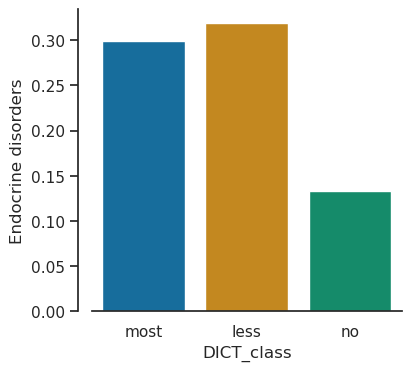

Proportion of Surgical and medical procedures


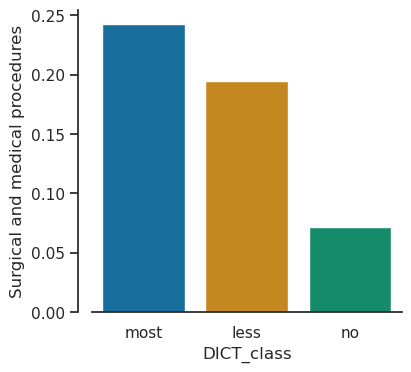

Proportion of Vascular disorders


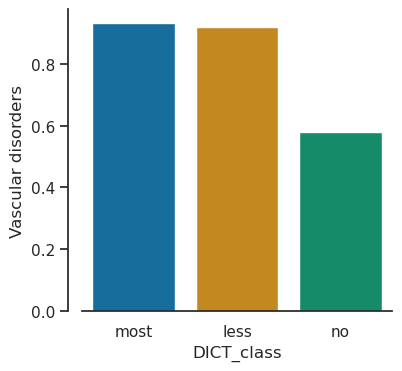

Proportion of Blood and lymphatic system disorders


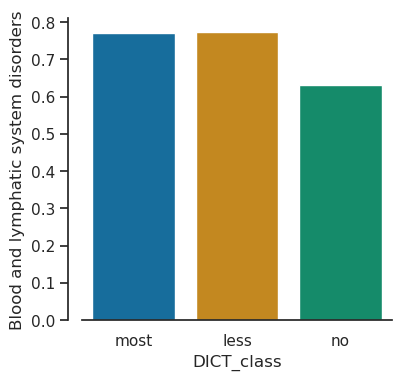

Proportion of Skin and subcutaneous tissue disorders


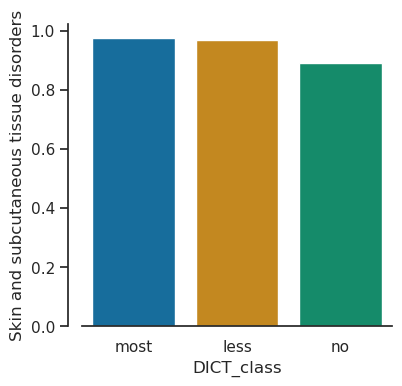

Proportion of Congenital, familial and genetic disorders


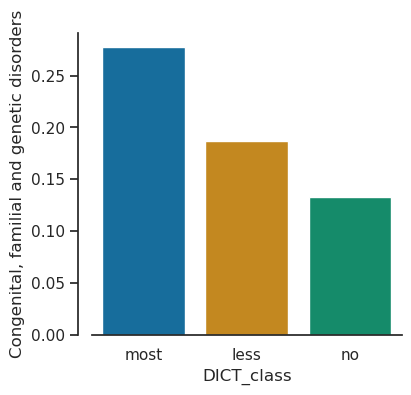

Proportion of Infections and infestations


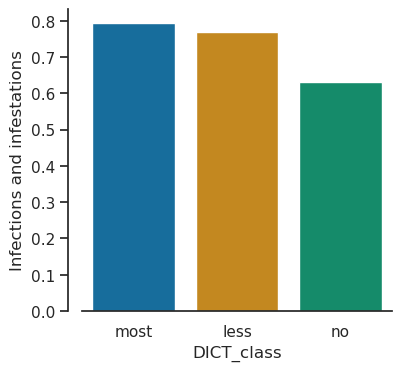

Proportion of Respiratory, thoracic and mediastinal disorders


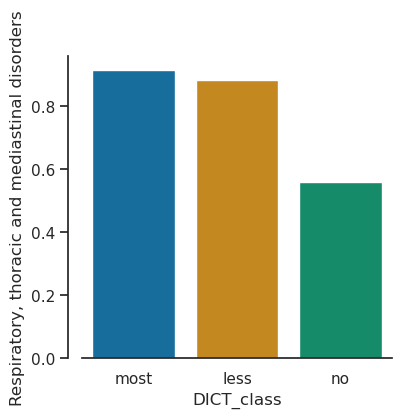

Proportion of Psychiatric disorders


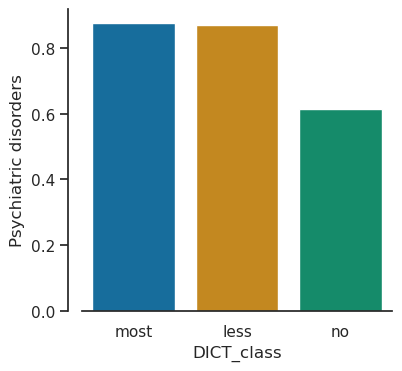

Proportion of Renal and urinary disorders


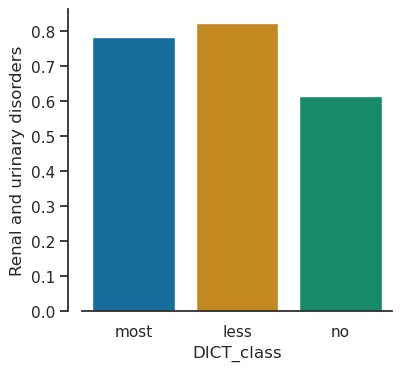

Proportion of Pregnancy, puerperium and perinatal conditions


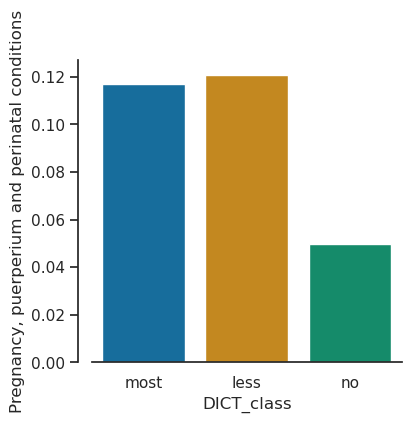

Proportion of Ear and labyrinth disorders


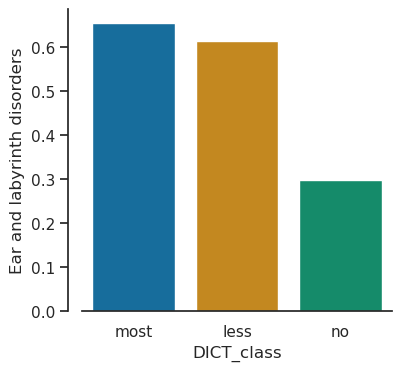

Proportion of Cardiac disorders


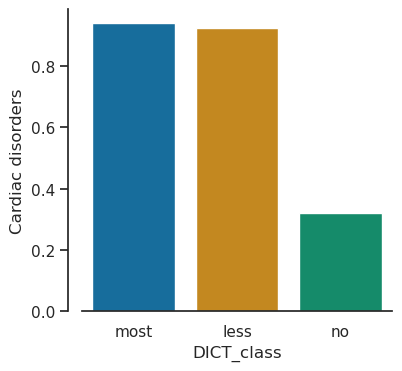

Proportion of Nervous system disorders


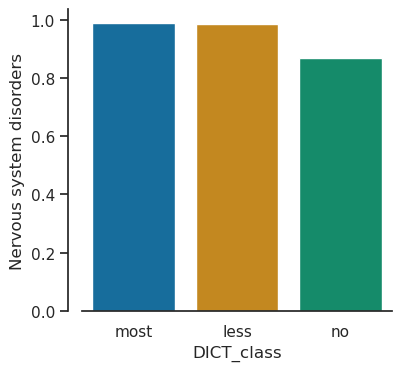

Proportion of Injury, poisoning and procedural complications


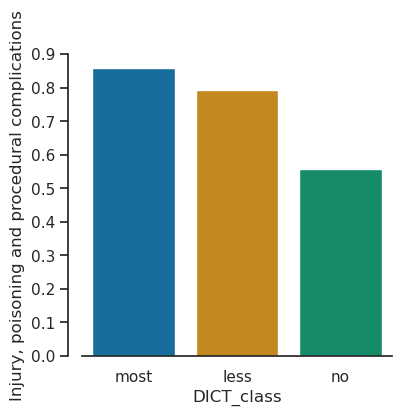

,Label,Proportion,Chi2 value,P value
0,Hepatobiliary disorders,0.641753,7.245585,2.670799e-02
1,Metabolism and nutrition disorders,0.788660,22.657074,1.202483e-05
2,Product issues,0.018041,0.241178,8.863983e-01
3,Eye disorders,0.672680,99.412101,2.587835e-22
4,Investigations,0.893041,18.483349,9.691517e-05
5,Musculoskeletal and connective tissue disorders,0.786082,40.638266,1.498003e-09
6,Gastrointestinal disorders,0.969072,7.274685,2.632221e-02
7,Social circumstances,0.237113,11.405051,3.337527e-03
8,Immune system disorders,0.770619,6.489199,3.898417e-02
9,Reproductive system and breast disorders,0.623711,25.642697,2.702459e-06


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency


df = merged_df
results = []

for label in sider.columns[2:].to_list():
    
    # 1. Visualization

    # Set a colorblind-friendly palette
    colors = sns.color_palette("colorblind")
    # Create a bar plot
    plt.figure(figsize=(4, 4), dpi=100)
    sns.set(style="white")  # Set the style

    ax = sns.barplot(x="DICT _ Concern", y=label, data=df, ci=None, palette=colors)

    # Set labels and title
    print(f'Proportion of {label}')
    #ax.set_ylabel(f'Proportion of {label}', fontsize=12)
    ax.set_xlabel('DICT_class', fontsize=12)
    #ax.set_title(f'Proportion of {label} across DICT_class', fontsize=14)

    # Remove box line, set y-axis on the left
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_position(('outward', 10))
    ax.yaxis.set_ticks_position('left')

    plt.show()

    # 2. Chi-squared Test

    # Create a contingency table
    contingency_table = pd.crosstab(df["DICT _ Concern"], df[label])

    # Perform the chi-squared test
    chi2, p, _, _ = chi2_contingency(contingency_table)

    #Store results
    label_proportions = df[label].mean()
    results.append({
        'Label': label,
        'Proportion': label_proportions,
        'Chi2 value': chi2,
        'P value': p
    })

results_df = pd.DataFrame(results)
results_df


In [19]:
results_df["Chi2 value" ] = results_df["Chi2 value"].astype(float)
results_df = results_df.sort_values("Chi2 value", ascending=False)
results_df

,Label,Proportion,Chi2 value,P value
24,Cardiac disorders,0.788660,310.645934,3.500197e-68
14,Vascular disorders,0.842784,123.109493,1.849751e-27
19,"Respiratory, thoracic and mediastinal disorders",0.815722,105.232842,1.409220e-23
3,Eye disorders,0.672680,99.412101,2.587835e-22
23,Ear and labyrinth disorders,0.551546,62.150144,3.193506e-14
20,Psychiatric disorders,0.811856,60.964755,5.776591e-14
26,"Injury, poisoning and procedural complications",0.757732,54.366598,1.564744e-12
25,Nervous system disorders,0.957474,47.076564,5.990376e-11
5,Musculoskeletal and connective tissue disorders,0.786082,40.638266,1.498003e-09
21,Renal and urinary disorders,0.761598,29.725169,3.509632e-07


<Figure size 2400x1800 with 0 Axes>

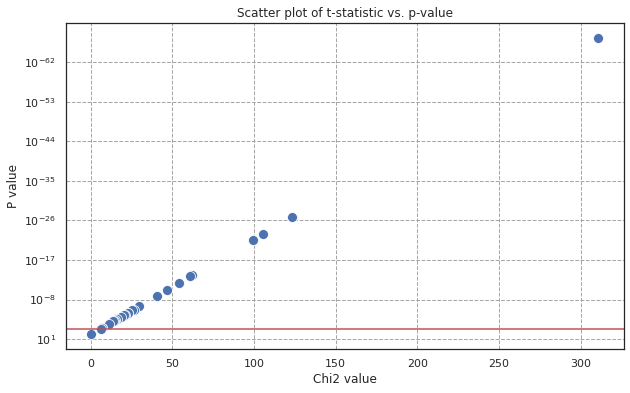

In [20]:
## Plotting

plt.figure(figsize=(8, 6), dpi=300) 
sns.set(style="white")  # Set the style
    
plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df, x='Chi2 value', y='P value', palette='tab10', s=100)
plt.yscale('log')
plt.gca().invert_yaxis()  # This line will reverse the y-axis
    
plt.title('Scatter plot of t-statistic vs. p-value')
plt.grid(True, which="both", ls="--", c='0.65')
    
plt.axhline(y=0.05, color='r', linestyle='-')
#plt.legend()
plt.savefig(f'SIDER_fractions_chisquare_comparison.png', bbox_inches='tight')
plt.show()
           

In [21]:
metrics_df = pd.DataFrame(columns=['Side_Effect', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
results_list = []  

for effect in sider.columns[2:].to_list():    

    # Assuming merged_df is the dataframe from previous example

    y_true = merged_df['DICTrank']
    y_pred = merged_df[effect]

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    

      # Append metrics for the current effect to the results list
    results_list.append({
        'Side_Effect': effect,
        'Accuracy': accuracy * 100,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

# Convert the results list to a DataFrame and concatenate to the metrics dataframe
metrics_df = pd.concat([metrics_df, pd.DataFrame(results_list)], ignore_index=True)

# Display the metrics dataframe
metrics_df

,Side_Effect,Accuracy,Precision,Recall,F1-Score
0,Hepatobiliary disorders,60.438144,0.789157,0.660504,0.719122
1,Metabolism and nutrition disorders,70.747423,0.800654,0.823529,0.81193
2,Product issues,24.35567,0.785714,0.018487,0.036125
3,Eye disorders,73.324742,0.871648,0.764706,0.814682
4,Investigations,75.0,0.789322,0.919328,0.849379
5,Musculoskeletal and connective tissue disorders,73.06701,0.816393,0.836975,0.826556
6,Gastrointestinal disorders,76.417526,0.773936,0.978151,0.864143
7,Social circumstances,40.335052,0.858696,0.265546,0.405648
8,Immune system disorders,67.654639,0.787625,0.791597,0.789606
9,Reproductive system and breast disorders,64.046392,0.826446,0.672269,0.741427


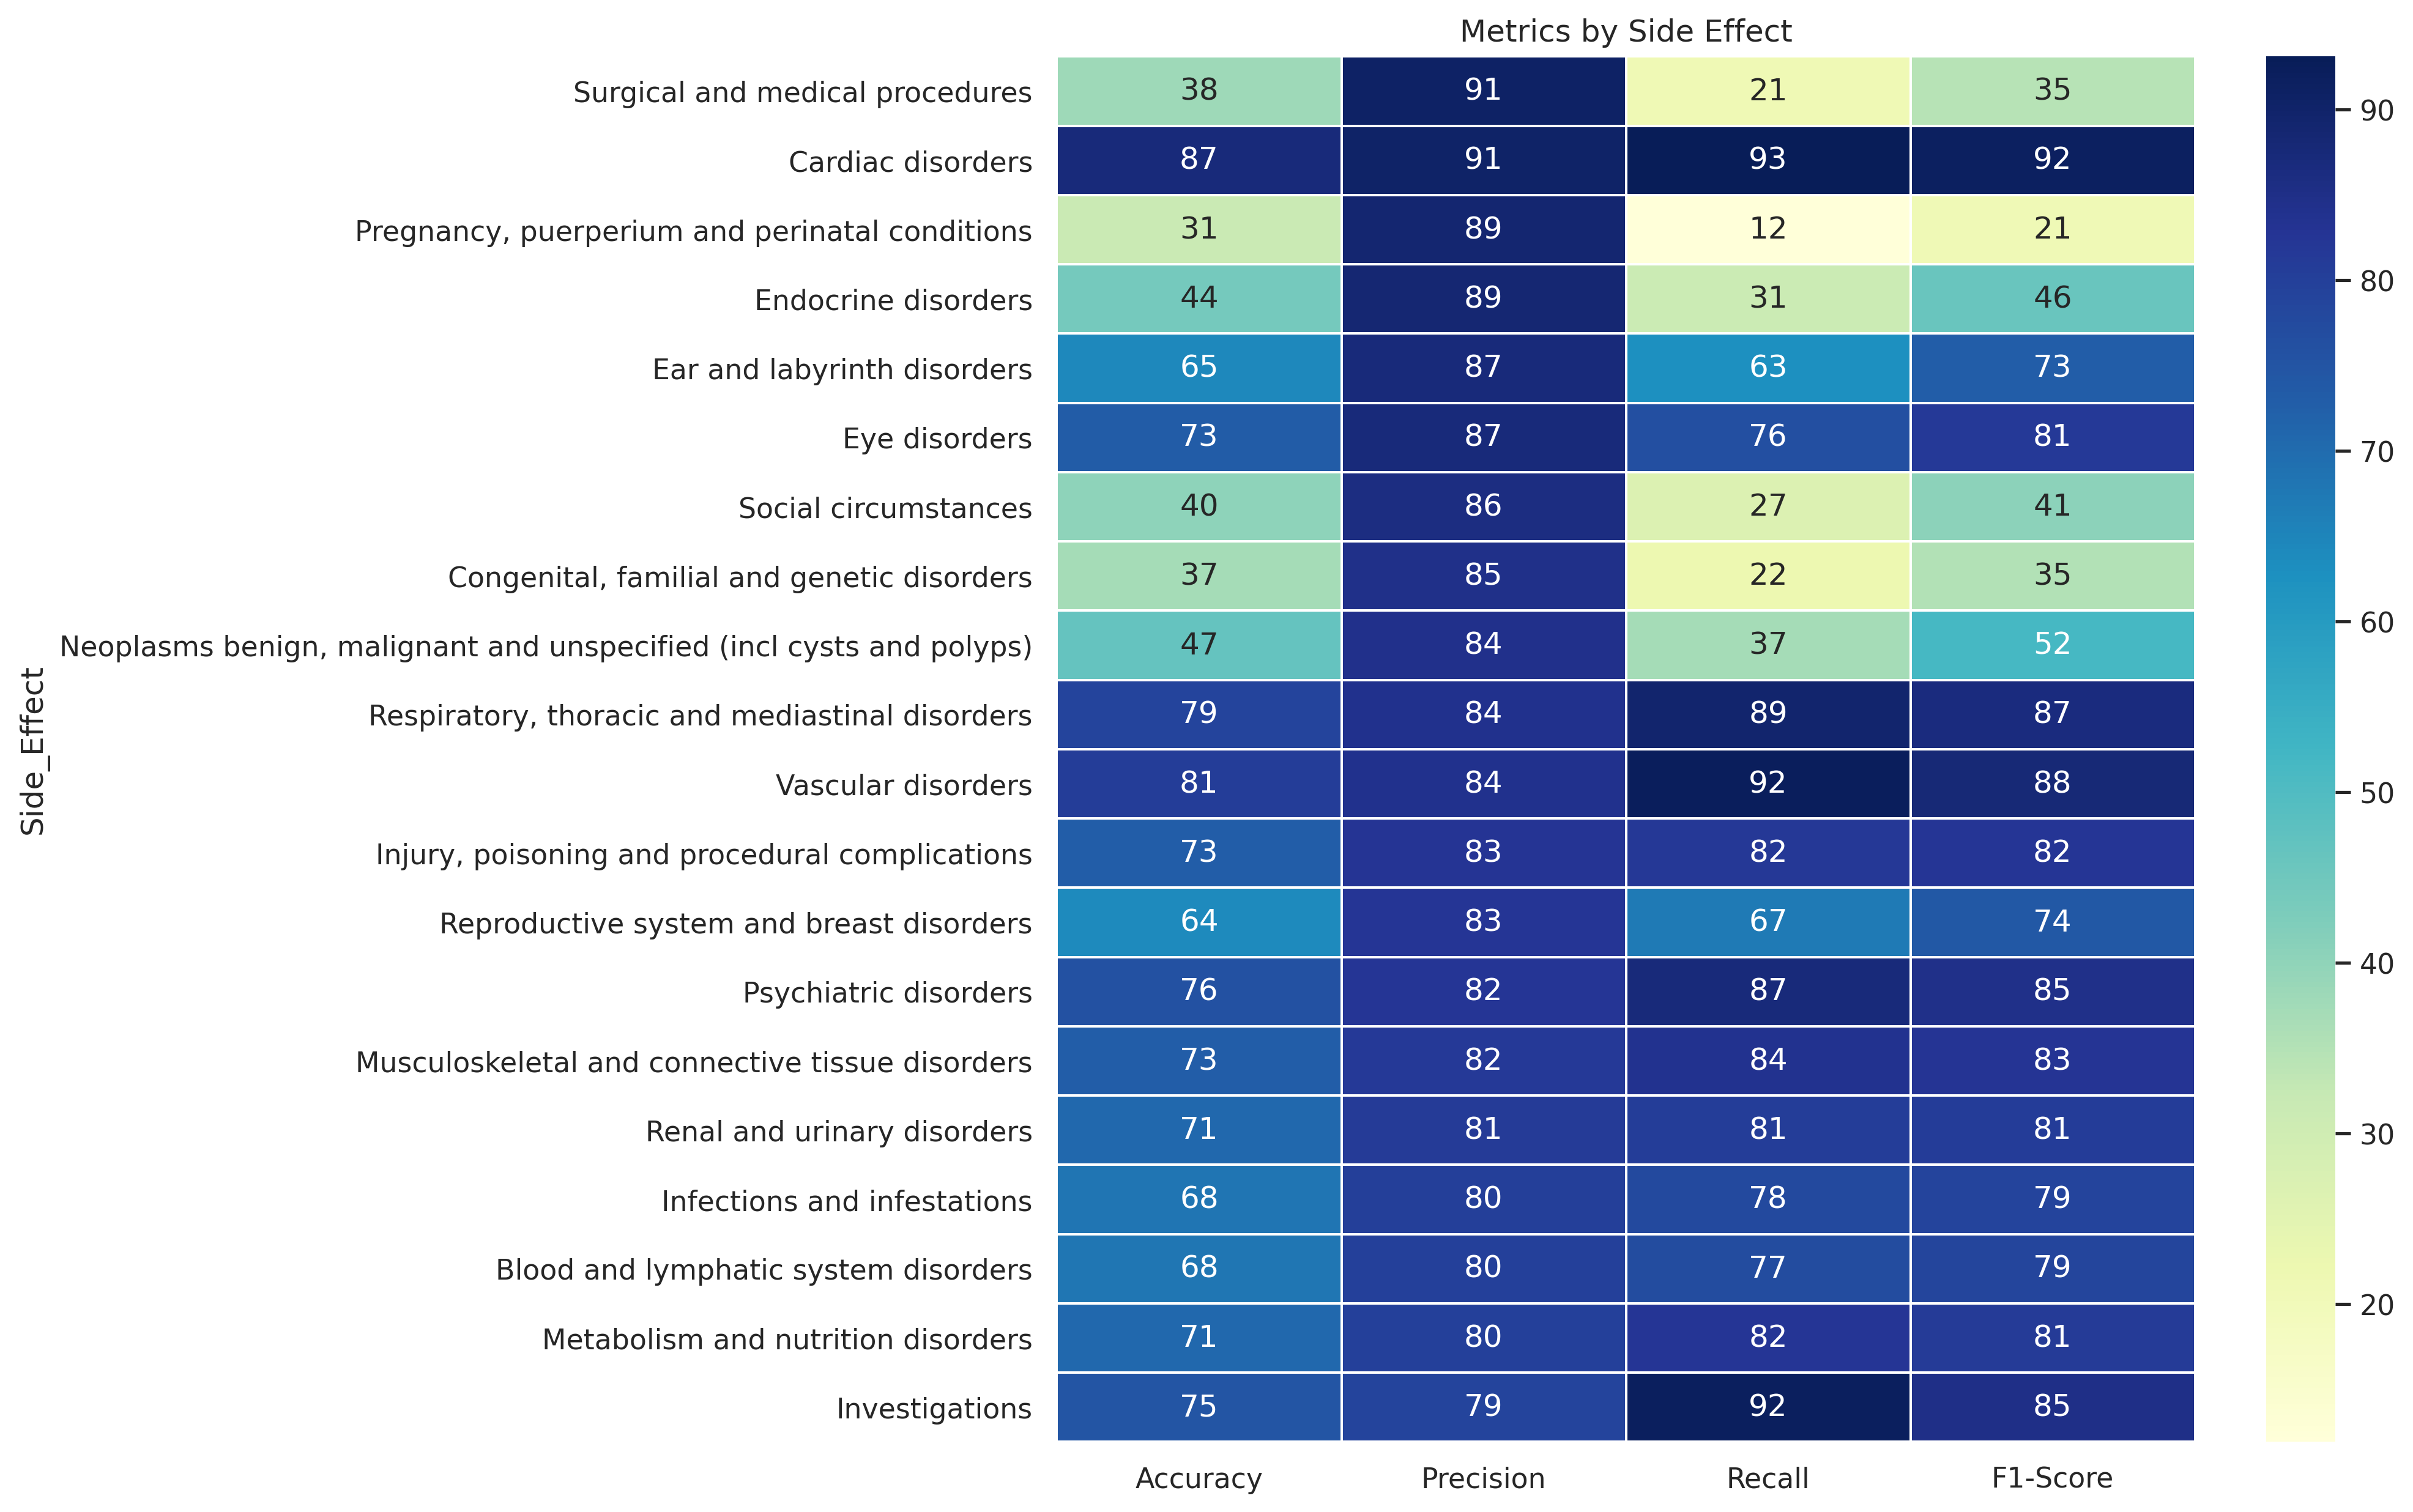

In [22]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = metrics_df.sort_values("Precision", ascending=False)[:20]

# Convert columns to float type (or you can also use pd.to_numeric())
for col in ['Accuracy', 'Precision', 'Recall', 'F1-Score']:
    df[col] = df[col].astype(float)

# Handle NaN values (if any). Here, I'm filling NaNs with 0.
df.fillna(0, inplace=True)

# Normalize the metrics to make them comparable
df['Precision'] = df['Precision'] * 100
df['Recall'] = df['Recall'] * 100
df['F1-Score'] = df['F1-Score'] * 100

# Set the Side_Effect column as the index for the heatmap
df.set_index('Side_Effect', inplace=True)

# Plotting heatmap
plt.figure(figsize=(10,10), dpi=300)
sns.heatmap(df, cmap="YlGnBu", annot=True, linewidths=.5)
plt.title('Metrics by Side Effect')
plt.show()


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Set a colorblind-friendly palette
colors = sns.color_palette("colorblind")
results = []

for label in sider.columns[2:]:
    
    # 1. Visualization

    # Set a colorblind-friendly palette
    colors = sns.color_palette("colorblind")
    # Create a bar plot
    #plt.figure(figsize=(4, 4), dpi=100)
    #sns.set(style="white")  # Set the style

    #ax = sns.barplot(x="DICT _ Concern", y=label, data=df, ci=None, palette=colors)

    # Set labels and title
    print(f'Proportion of {label}')
    #ax.set_ylabel(f'Proportion of {label}', fontsize=12)
    #ax.set_xlabel('DICT_class', fontsize=12)
    #ax.set_title(f'Proportion of {label} across DICT_class', fontsize=14)

    # Remove box line, set y-axis on the left
    #ax.spines['top'].set_visible(False)
    #ax.spines['right'].set_visible(False)
    #ax.spines['left'].set_position(('outward', 10))
    #ax.yaxis.set_ticks_position('left')

    #plt.show()

    # 2.Tests

    # Create a contingency table
    contingency_table = pd.crosstab(merged_df["DICTrank"], merged_df[label])
        
    # Perform the chi-squared test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    results.append({
            'Label': label,
            'Proportion': merged_df[label].mean(),
            'Test': 'Chi2',
            'Statistic value': chi2,
            'P value': p
    })

    

results_df = pd.DataFrame(results)
results_df

Proportion of Hepatobiliary disorders
Proportion of Metabolism and nutrition disorders
Proportion of Product issues
Proportion of Eye disorders
Proportion of Investigations
Proportion of Musculoskeletal and connective tissue disorders
Proportion of Gastrointestinal disorders
Proportion of Social circumstances
Proportion of Immune system disorders
Proportion of Reproductive system and breast disorders
Proportion of Neoplasms benign, malignant and unspecified (incl cysts and polyps)
Proportion of General disorders and administration site conditions
Proportion of Endocrine disorders
Proportion of Surgical and medical procedures
Proportion of Vascular disorders
Proportion of Blood and lymphatic system disorders
Proportion of Skin and subcutaneous tissue disorders
Proportion of Congenital, familial and genetic disorders
Proportion of Infections and infestations
Proportion of Respiratory, thoracic and mediastinal disorders
Proportion of Psychiatric disorders
Proportion of Renal and urinary d

,Label,Proportion,Test,Statistic value,P value
0,Hepatobiliary disorders,0.641753,Chi2,3.559615,5.920146e-02
1,Metabolism and nutrition disorders,0.788660,Chi2,17.722862,2.555370e-05
2,Product issues,0.018041,Chi2,0.000000,1.000000e+00
3,Eye disorders,0.672680,Chi2,96.331299,9.718153e-23
4,Investigations,0.893041,Chi2,17.292455,3.204567e-05
5,Musculoskeletal and connective tissue disorders,0.786082,Chi2,38.003898,7.060342e-10
6,Gastrointestinal disorders,0.969072,Chi2,5.777209,1.623530e-02
7,Social circumstances,0.237113,Chi2,10.736569,1.050389e-03
8,Immune system disorders,0.770619,Chi2,5.852266,1.555700e-02
9,Reproductive system and breast disorders,0.623711,Chi2,24.748325,6.532554e-07


In [24]:
results_df["Statistic value" ] = results_df["Statistic value"].astype(float)
results_df = results_df.sort_values("Statistic value", ascending=False)
results_df

,Label,Proportion,Test,Statistic value,P value
24,Cardiac disorders,0.788660,Chi2,306.836910,1.067318e-68
14,Vascular disorders,0.842784,Chi2,120.353050,5.294712e-28
19,"Respiratory, thoracic and mediastinal disorders",0.815722,Chi2,102.072986,5.351335e-24
3,Eye disorders,0.672680,Chi2,96.331299,9.718153e-23
23,Ear and labyrinth disorders,0.551546,Chi2,59.859912,1.018551e-14
20,Psychiatric disorders,0.811856,Chi2,59.269007,1.375255e-14
26,"Injury, poisoning and procedural complications",0.757732,Chi2,49.883964,1.631123e-12
25,Nervous system disorders,0.957474,Chi2,44.193346,2.974908e-11
5,Musculoskeletal and connective tissue disorders,0.786082,Chi2,38.003898,7.060342e-10
21,Renal and urinary disorders,0.761598,Chi2,27.552827,1.528618e-07


<Figure size 2400x1800 with 0 Axes>

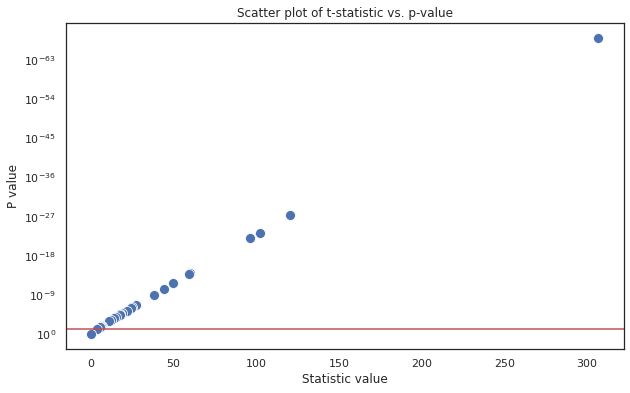

In [25]:
## Plotting

plt.figure(figsize=(8, 6), dpi=300) 
sns.set(style="white")  # Set the style
    
plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df, x='Statistic value', y='P value', palette='tab10', s=100)
plt.yscale('log')
plt.gca().invert_yaxis()  # This line will reverse the y-axis
    
plt.title('Scatter plot of t-statistic vs. p-value')
#plt.grid(True, which="both", ls="--", c='0.65')
    
plt.axhline(y=0.05, color='r', linestyle='-')
#plt.legend()
plt.show()
           